In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [14]:
df=pd.read_csv('C:/Users/Mehmet Nur Kavan/Desktop/machine_learning/301/Hitters.csv')
df=df.dropna()
dms=pd.get_dummies(df[['League','Division','NewLeague']])
y=df["Salary"] # bağımlı değişken
x_=df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')
x=pd.concat([x_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

modle  tahmin

In [15]:
gbm_model = GradientBoostingRegressor().fit(x_train, y_train)

In [16]:
gbm_model

GradientBoostingRegressor()

In [17]:
y_pred = gbm_model.predict(x_test)

In [18]:
np.sqrt(mean_squared_error(y_test, y_pred))

347.7008662175021

Model Tuning

In [25]:
gbm_model = GradientBoostingRegressor().fit(x_train, y_train)

In [26]:
?gbm_model

Type:        GradientBoostingRegressor
String form: GradientBoostingRegressor()
Length:      100
File:        c:\users\mehmet nur kavan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py
Docstring:  
Gradient Boosting for regression.

This estimator builds an additive model in a forward stage-wise fashion; it
allows for the optimization of arbitrary differentiable loss functions. In
each stage a regression tree is fit on the negative gradient of the given
loss function.

:class:`sklearn.ensemble.HistGradientBoostingRegressor` is a much faster
variant of this algorithm for intermediate datasets (`n_samples >= 10_000`).

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'squared_error', 'absolute_error', 'huber', 'quantile'},             default='squared_error'
    Loss function to be optimized. 'squared_error' refers to the squared
    error for regression. 'absolute_error' refers to the absolute error of
    regression and is a robust loss function

In [27]:
gbm_parms = {"learning_rate": [0.001, 0.1, 0.01], "max_depth": [3,5,8], "n_estimators":[100,200,500],"subsample": [1, 0.5, 0.8], "loss": ["ls","lad","quantile"]}

In [31]:
gbm_cv_model = GridSearchCV(gbm_model, gbm_parms, cv = 10, n_jobs = -1, verbose = 2).fit(x_train, y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


c:\Users\Mehmet Nur Kavan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1620 fits failed out of a total of 2430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
154 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Mehmet Nur Kavan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Mehmet Nur Kavan\anaconda3\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Mehmet Nur Kavan\anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  

In [32]:
gbm_cv_model.best_params_

{'learning_rate': 0.1,
 'loss': 'quantile',
 'max_depth': 5,
 'n_estimators': 500,
 'subsample': 0.5}

In [37]:
# yukrdaki best performdaki değerleri burda giriyoruz
gbm_tuned = GradientBoostingRegressor(learning_rate= 0.1, loss='quantile', max_depth=5, n_estimators=500, subsample=0.5).fit(x_train, y_train)

In [38]:
y_pred = gbm_tuned.predict(x_test)

In [39]:
np.sqrt(mean_squared_error(y_test, y_pred))

395.9364789236196

degisken onem duzeyleri

In [41]:
gbm_tuned.feature_importances_*100

array([ 5.19512841,  5.78034115,  4.16821059,  4.75091423,  7.51323927,
       10.5793097 ,  3.25031795,  4.84902151,  4.75870521,  5.8701509 ,
        5.16357111,  6.05050776,  7.04162871,  6.51385934,  8.88529094,
        6.39280699,  1.14885372,  1.29980984,  0.78833267])

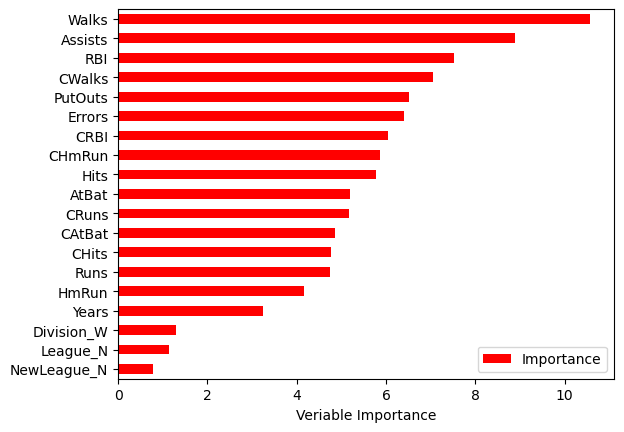

In [42]:
Importance = pd.DataFrame({'Importance': gbm_tuned.feature_importances_*100 }, index = x_train.columns)
Importance.sort_values(by = 'Importance', axis= 0, ascending = True).plot(kind= 'barh', color = 'r',)
plt.xlabel('Veriable Importance')
plt.gca().lengend_ = None